#### CMSE 202 Final Project
### &#9989; Michael Bellaver, Shane Painter, Evelyn Bruinsma, Jared Robinson, Kaylie Mendoza, Steven Orbain
### &#9989; Section: 003

# ___Modelling Planetary Motion with Newton's Laws of Motion___

## Data

Mercury:
*   Mass: 3.285 × 10^23 kg
*   Orbital Radius: 5.984e+7 km

Earth:
*   Mass: 5.972 × 10^24 kg
*   Orbital Radius: 1.496e+8 km

Venus:
*   Mass: 4.867 × 10^24 kg
*   Orbital Radius: 1.047e+8 km

Sun's Mass: 1.989 × 10^30 kg     




## Modeling

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Ea_mass = 1 # Units of Earth mass
Ea_radius = 1 # Units of Earth distance from the sun
Sun_mass = 333000 # Sun's mass in Earth-mass units
G_N = 4*np.pi**2/Sun_mass # This is Newton's constant G

class Planet(object):
        
    # This is an initialization command that gives the object its personal variables. 
    # We are providing the planet with a mass, m, initial position, x and initial velocity, vy.
    # Notice all the "self" commands.
    def __init__(self, m, x, vy, name):
        self.name = name
        self.m = m # Mass of planet in units of Earth mass
        self.x = x #(AU) Initial x coordinate of planet. (All planets start at coordinates (r,0))
        self.y = 0 #(AU) Initial y coordinate
        self.r = x # x = r initially
        self.vy = vy #(AU/yr) Initial velocity in y direction
        self.vx = 0 #(AU/yr) Initial velocity in x direction (All planets start with initial velocity (0, vy)).
        self.ay = 1 #(AU/yr**2) Dummy value here.  Will be set using acc_update() after all planets initialized.
        self.ax = 1 #(AU/yr**2) Dummy value here.  Will be set using acc_update() after all planets initialized.
        
        self.xvals = [] # list where we will store the x value over time
        self.yvals = [] # list where we will store the y value over time
        
        self.ay_old = 1 # dummy variable for storing the old y acceleration
        self.ax_old = 1 # dummy variable for storing the old x acceleration
        
        self.xvals.append(self.x) # Stores the initial x value in the list of x values
        self.yvals.append(self.y) # Stores the initial y value in the list of y values
        
    # Function for calculating total acceleration. "other" will be a list that contains all planets
    def acc_update(self, other):
        self.ay_old = self.ay # Stores previous y acceleration for Verlet method calculation
        self.ax_old = self.ax # Stores previous x acceleration for Verlet method calculation
        self.ax = 0 # Resets x acceleration 
        self.ay = 0 # Resets y acceleration
        
        # Goes through list of "other" planets to add contribution of each to acceleration of planet "self"
        for i in other:
            # Sums the acceleration if planet on list is not "self"
            if i != self:
                dx = self.x - i.x # Calculates x difference between planets
                dy = self.y - i.y # Calculates y difference between planets
                
                r = np.sqrt(dx**2 + dy**2) # Calculate magnitude between planets here using dx and dy
                self.ax += -G_N*i.m/(np.linalg.norm(r)**3)*dx # Calculate the contribution to acceleration in x direction to be added here
                self.ay += -G_N*i.m/(np.linalg.norm(r)**3)*dy # Calculate the contribution to acceleration in y direction to be added here


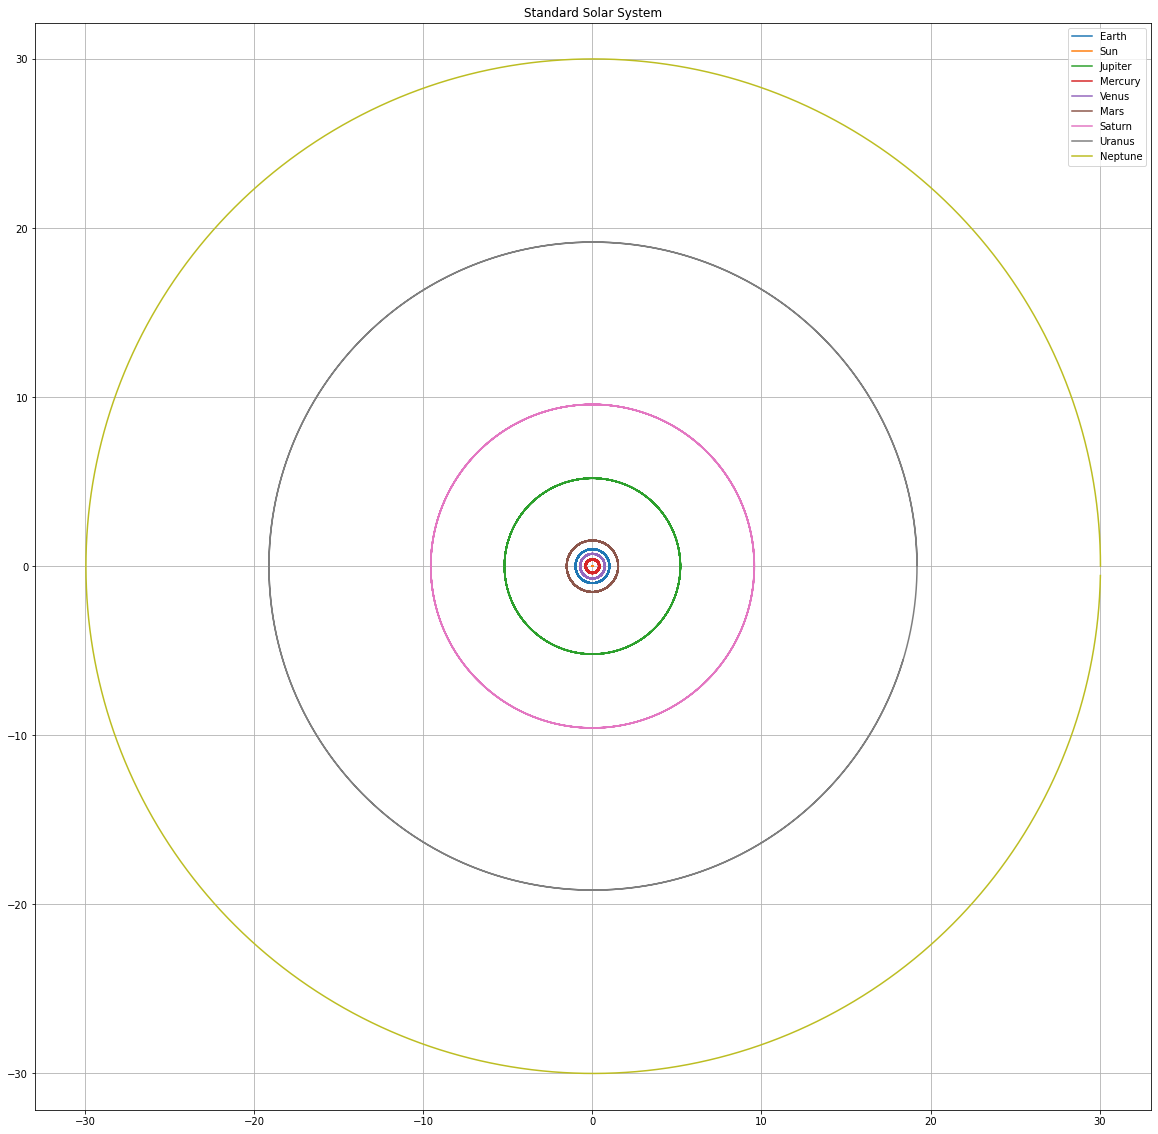

In [ ]:
# Create a model of our Solar System in this cell and plot the result
Jup_mass = 317.8
Jup_radius = 5.2
vy_Jup = np.sqrt(G_N*Sun_mass/Jup_radius)

Merc_mass = .0553
Merc_radius = .387
vy_Merc = np.sqrt(G_N*Sun_mass/Merc_radius)

Ven_mass = .815
Ven_radius = .723
vy_Ven = np.sqrt(G_N*Sun_mass/Ven_radius)

Mars_mass = .107
Mars_radius = 1.52
vy_Mars = np.sqrt(G_N*Sun_mass/Mars_radius)

Sat_mass = 95.2
Sat_radius = 9.58
vy_Sat = np.sqrt(G_N*Sun_mass/Sat_radius)

Ura_mass = 14.5
Ura_radius = 19.2
vy_Ura = np.sqrt(G_N*Sun_mass/Ura_radius)

Nep_mass = 17.1
Nep_radius = 30.05
vy_Nep = np.sqrt(G_N*Sun_mass/Nep_radius)

vy_Ea = np.sqrt(G_N*Sun_mass/Ea_radius) #Initial v_y of the Earth
vy_s = -(Ea_mass*vy_Ea+Jup_mass*vy_Jup+Merc_mass*vy_Merc+Ven_mass*vy_Ven+Mars_mass*vy_Mars+Sat_mass*vy_Sat+Ura_mass*vy_Ura+Nep_mass*vy_Nep)/Sun_mass # Initial v_y of the Sun. balance momentum so center of mass doesn't change. Add planets each time
x_s = 0 # Sun is initially at the origin

Earth = Planet(Ea_mass,Ea_radius,vy_Ea, 'Earth')
Sun = Planet(Sun_mass,x_s,vy_s, 'Sun') 
Jupiter = Planet(Jup_mass,Jup_radius,vy_Jup, 'Jupiter')
Mercury = Planet(Merc_mass,Merc_radius,vy_Merc, 'Mercury')
Venus = Planet(Ven_mass,Ven_radius,vy_Ven, 'Venus')
Mars = Planet(Mars_mass,Mars_radius,vy_Mars, 'Mars')
Saturn = Planet(Sat_mass,Sat_radius,vy_Sat, 'Saturn')
Uranus = Planet(Ura_mass,Ura_radius,vy_Ura, 'Uranus')
Neptune = Planet(Nep_mass,Nep_radius,vy_Nep, 'Neptune')

N = 10000 # Number of steps we want to take
tf = 163.7 # Number of years we want to analyze
h = tf/N # Calculated step size

# A list we are creating to store our planets in
planetlist = []

# Storing our created planets into our list
planetlist.append(Earth)
planetlist.append(Sun)
planetlist.append(Jupiter)
planetlist.append(Mercury)
planetlist.append(Venus)
planetlist.append(Mars)
planetlist.append(Saturn)
planetlist.append(Uranus)
planetlist.append(Neptune)

# Set the initial values for the acceleration of each planet
for planet in planetlist:
        planet.acc_update(planetlist) # Function for updating acceleration

# Performing Velocity Verlet Method
for i in range(N):
    for planet in planetlist:  # Update position of each planet
        planet.x += h*planet.vx + h**2/2*planet.ax # Updating x position
        planet.y += h*planet.vy + h**2/2*planet.ay # insert code for updating y position
        planet.r = np.sqrt(planet.x**2+planet.y**2) # Calculating distance of planet from origin. 

    for planet in planetlist:  # Update acceleration and velocity of each planet
        planet.acc_update(planetlist)  # Function for updating acceleration
        
        # For updating velocities, see Eq. 5b in Notebook 6. You'll need both current and old acceleration values.
        planet.vx += h*planet.ax_old + h/2*(planet.ax - planet.ax_old) # insert code for updating x velocity here using Velocity Verlet method. (See Eq. 5b in Notebook 6. )
        planet.vy += h*planet.ay_old + h/2*(planet.ay - planet.ay_old) # insert code for updating y velocity here using Velocity Verlet method. 
        planet.xvals.append(planet.x) # Stores x values
        planet.yvals.append(planet.y) # Stores y values

plt.figure(figsize=(20,20))

for planet in planetlist:
    plt.plot(planet.xvals,planet.yvals, label = planet.name)
    
plt.title("Standard Solar System")
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()

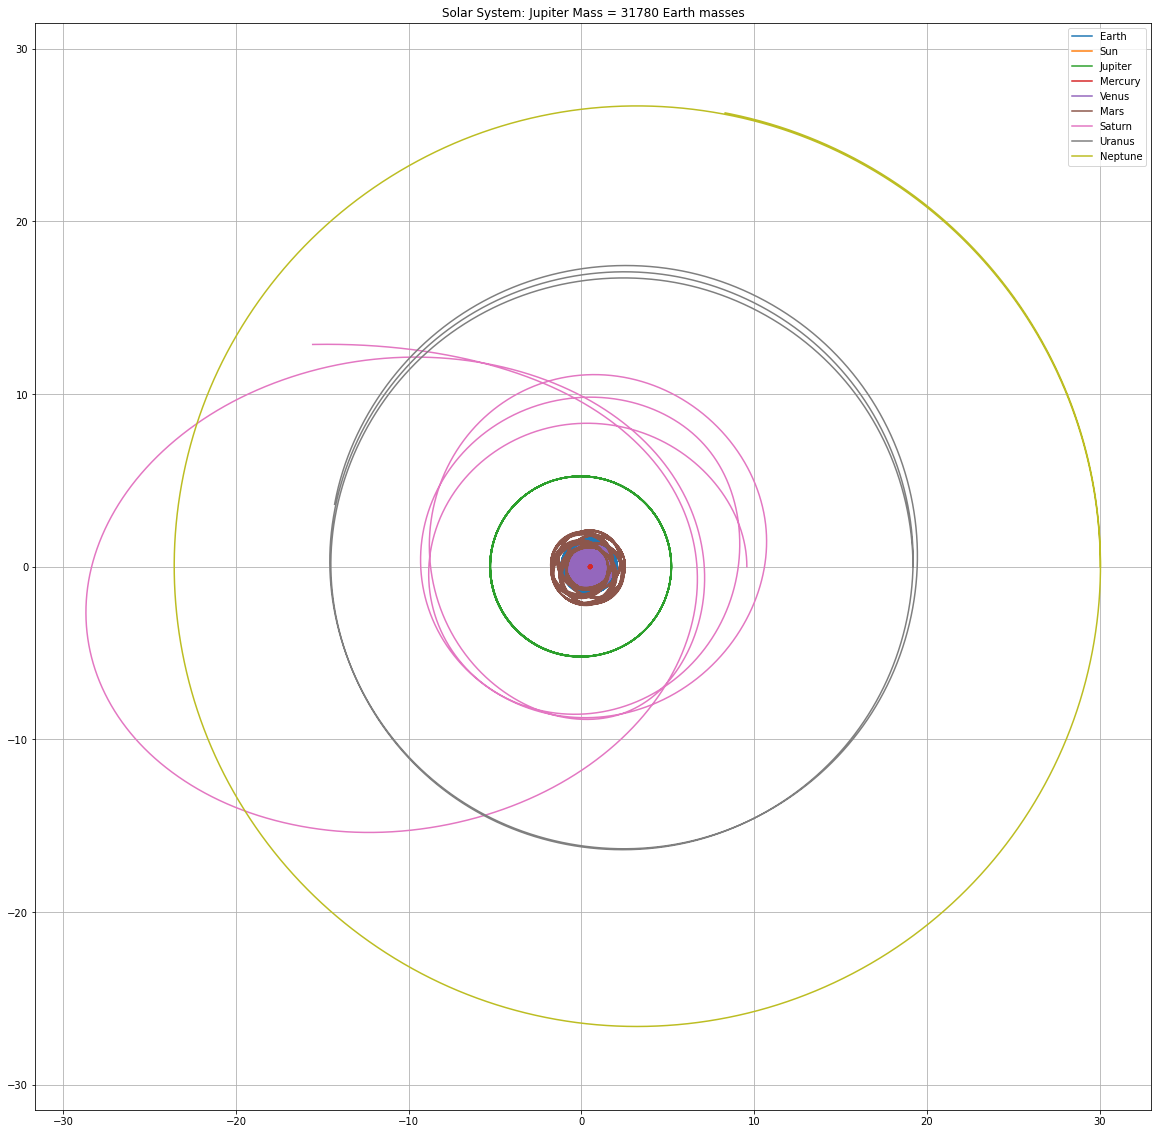

In [ ]:
Ea_mass = 1 # Units of Earth mass
Ea_radius = 1 # Units of Earth distance from the sun
Sun_mass = 333000 # Sun's mass in Earth-mass units
G_N = 4*np.pi**2/Sun_mass # This is Newton's constant G

Jup_mass_adj = 317.8 * 100
Jup_radius = 5.2
vy_Jup = np.sqrt(G_N*Sun_mass/Jup_radius)

Merc_mass = .0553
Merc_radius = .387
vy_Merc = np.sqrt(G_N*Sun_mass/Merc_radius)

Ven_mass = .815
Ven_radius = .723
vy_Ven = np.sqrt(G_N*Sun_mass/Ven_radius)

Mars_mass = .107
Mars_radius = 1.52
vy_Mars = np.sqrt(G_N*Sun_mass/Mars_radius)

Sat_mass = 95.2
Sat_radius = 9.58
vy_Sat = np.sqrt(G_N*Sun_mass/Sat_radius)

Ura_mass = 14.5
Ura_radius = 19.2
vy_Ura = np.sqrt(G_N*Sun_mass/Ura_radius)

Nep_mass = 17.1
Nep_radius = 30.05
vy_Nep = np.sqrt(G_N*Sun_mass/Nep_radius)

vy_s_Jup_adj = -(Ea_mass*vy_Ea+Jup_mass_adj*vy_Jup+Merc_mass*vy_Merc+Ven_mass*vy_Ven+Mars_mass*vy_Mars+Sat_mass*vy_Sat+Ura_mass*vy_Ura+Nep_mass*vy_Nep)/Sun_mass # Initial v_y of the Sun. balance momentum so center of mass doesn't change. Add planets each time
x_s = 0 # Sun is initially at the origin

Jupiter_adj = Planet(Jup_mass_adj,Jup_radius,vy_Jup, 'Jupiter')
Sun_Jup_adj = Planet(Sun_mass,x_s,vy_s_Jup_adj, 'Sun') 
Earth = Planet(Ea_mass,Ea_radius,vy_Ea, 'Earth')
Mercury = Planet(Merc_mass,Merc_radius,vy_Merc, 'Mercury')
Venus = Planet(Ven_mass,Ven_radius,vy_Ven, 'Venus')
Mars = Planet(Mars_mass,Mars_radius,vy_Mars, 'Mars')
Saturn = Planet(Sat_mass,Sat_radius,vy_Sat, 'Saturn')
Uranus = Planet(Ura_mass,Ura_radius,vy_Ura, 'Uranus')
Neptune = Planet(Nep_mass,Nep_radius,vy_Nep, 'Neptune')


N = 10000 # Number of steps we want to take
tf = 163.7 # Number of years we want to analyze
h = tf/N # Calculated step size

# A list we are creating to store our planets in
planetlist = []

# Storing our created planets into our list
planetlist.append(Earth)
planetlist.append(Sun_Jup_adj)
planetlist.append(Jupiter_adj)
planetlist.append(Mercury)
planetlist.append(Venus)
planetlist.append(Mars)
planetlist.append(Saturn)
planetlist.append(Uranus)
planetlist.append(Neptune)

# Set the initial values for the acceleration of each planet
for planet in planetlist:
        planet.acc_update(planetlist) # Function for updating acceleration

# Performing Velocity Verlet Method
for i in range(N):
    for planet in planetlist:  # Update position of each planet
        planet.x += h*planet.vx + h**2/2*planet.ax # Updating x position
        planet.y += h*planet.vy + h**2/2*planet.ay # insert code for updating y position
        planet.r = np.sqrt(planet.x**2+planet.y**2) # Calculating distance of planet from origin. 

    for planet in planetlist:  # Update acceleration and velocity of each planet
        planet.acc_update(planetlist)  # Function for updating acceleration
        
        # For updating velocities, see Eq. 5b in Notebook 6. You'll need both current and old acceleration values.
        planet.vx += h*planet.ax_old + h/2*(planet.ax - planet.ax_old) # insert code for updating x velocity here using Velocity Verlet method. (See Eq. 5b in Notebook 6. )
        planet.vy += h*planet.ay_old + h/2*(planet.ay - planet.ay_old) # insert code for updating y velocity here using Velocity Verlet method. 
        planet.xvals.append(planet.x) # Stores x values
        planet.yvals.append(planet.y) # Stores y values

plt.figure(figsize=(20,20))

for planet in planetlist:
    plt.plot(planet.xvals,planet.yvals, label = planet.name)

plt.title("Solar System: Jupiter Mass = %d Earth masses" %(float(Jup_mass_adj)))
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()

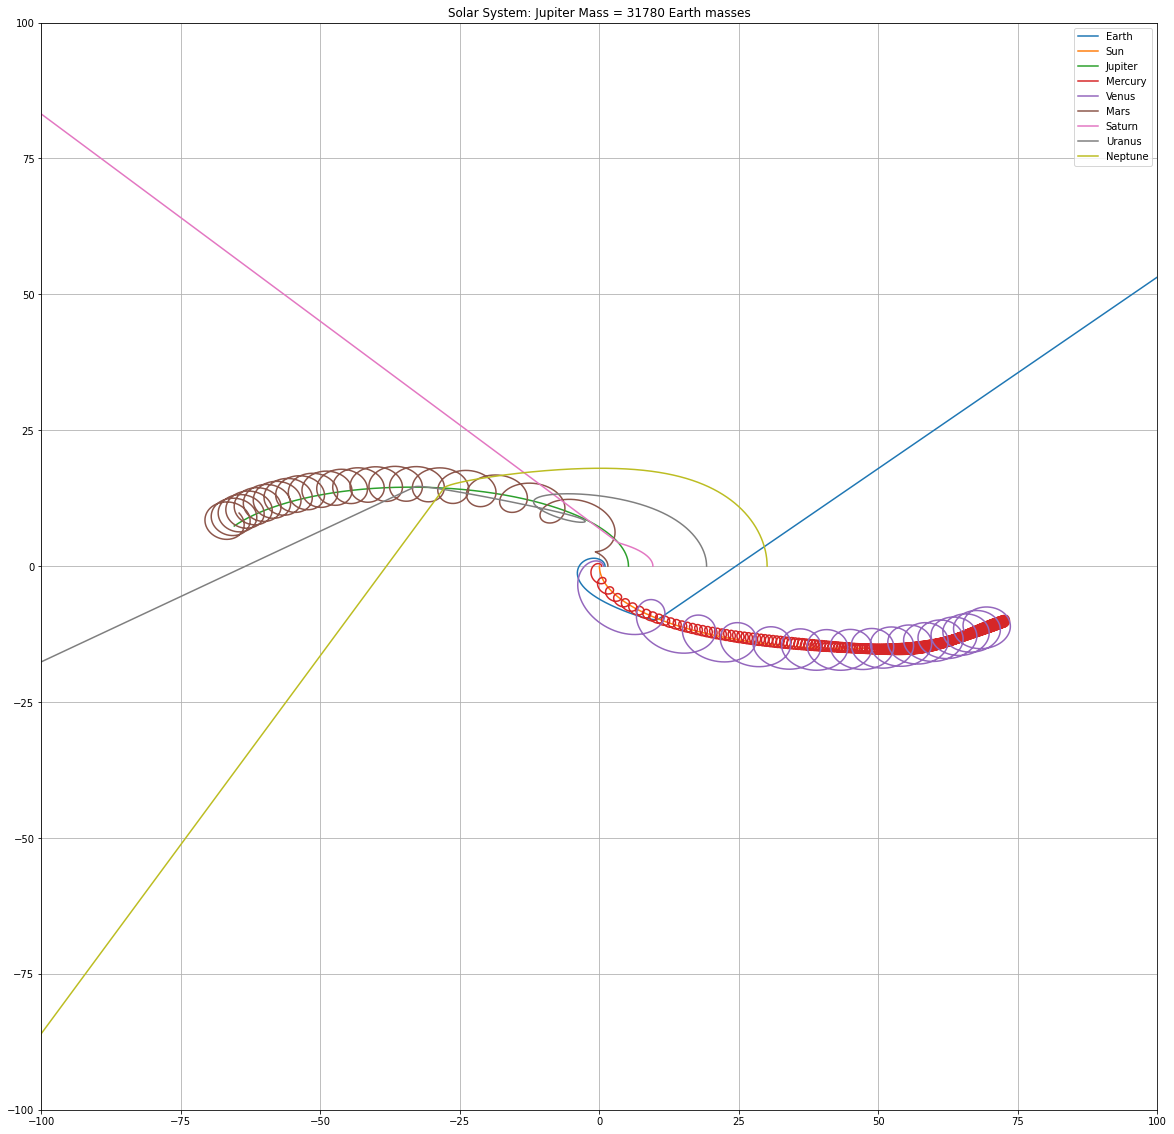

In [ ]:
Ea_mass = 1 # Units of Earth mass
Ea_radius = 1 # Units of Earth distance from the sun
Sun_mass = 333000 # Sun's mass in Earth-mass units
G_N = 4*np.pi**2/Sun_mass # This is Newton's constant G

Jup_mass_adj_2 = 317.8 * 1000
Jup_radius = 5.2
vy_Jup = np.sqrt(G_N*Sun_mass/Jup_radius)

Merc_mass = .0553
Merc_radius = .387
vy_Merc = np.sqrt(G_N*Sun_mass/Merc_radius)

Ven_mass = .815
Ven_radius = .723
vy_Ven = np.sqrt(G_N*Sun_mass/Ven_radius)

Mars_mass = .107
Mars_radius = 1.52
vy_Mars = np.sqrt(G_N*Sun_mass/Mars_radius)

Sat_mass = 95.2
Sat_radius = 9.58
vy_Sat = np.sqrt(G_N*Sun_mass/Sat_radius)

Ura_mass = 14.5
Ura_radius = 19.2
vy_Ura = np.sqrt(G_N*Sun_mass/Ura_radius)

Nep_mass = 17.1
Nep_radius = 30.05
vy_Nep = np.sqrt(G_N*Sun_mass/Nep_radius)

vy_s_Jup_adj_2 = -(Ea_mass*vy_Ea+Jup_mass_adj_2*vy_Jup+Merc_mass*vy_Merc+Ven_mass*vy_Ven+Mars_mass*vy_Mars+Sat_mass*vy_Sat+Ura_mass*vy_Ura+Nep_mass*vy_Nep)/Sun_mass # Initial v_y of the Sun. balance momentum so center of mass doesn't change. Add planets each time
x_s = 0 # Sun is initially at the origin

Jupiter_adj_2 = Planet(Jup_mass_adj_2,Jup_radius,vy_Jup, 'Jupiter')
Sun_Jup_adj_2 = Planet(Sun_mass,x_s,vy_s_Jup_adj_2, 'Sun') 
Earth = Planet(Ea_mass,Ea_radius,vy_Ea, 'Earth')
Mercury = Planet(Merc_mass,Merc_radius,vy_Merc, 'Mercury')
Venus = Planet(Ven_mass,Ven_radius,vy_Ven, 'Venus')
Mars = Planet(Mars_mass,Mars_radius,vy_Mars, 'Mars')
Saturn = Planet(Sat_mass,Sat_radius,vy_Sat, 'Saturn')
Uranus = Planet(Ura_mass,Ura_radius,vy_Ura, 'Uranus')
Neptune = Planet(Nep_mass,Nep_radius,vy_Nep, 'Neptune')


N = 10000 # Number of steps we want to take
tf = 163.7 # Number of years we want to analyze
h = tf/N # Calculated step size

# A list we are creating to store our planets in
planetlist = []

# Storing our created planets into our list
planetlist.append(Earth)
planetlist.append(Sun_Jup_adj_2)
planetlist.append(Jupiter_adj_2)
planetlist.append(Mercury)
planetlist.append(Venus)
planetlist.append(Mars)
planetlist.append(Saturn)
planetlist.append(Uranus)
planetlist.append(Neptune)

# Set the initial values for the acceleration of each planet
for planet in planetlist:
        planet.acc_update(planetlist) # Function for updating acceleration

# Performing Velocity Verlet Method
for i in range(N):
    for planet in planetlist:  # Update position of each planet
        planet.x += h*planet.vx + h**2/2*planet.ax # Updating x position
        planet.y += h*planet.vy + h**2/2*planet.ay # insert code for updating y position
        planet.r = np.sqrt(planet.x**2+planet.y**2) # Calculating distance of planet from origin. 

    for planet in planetlist:  # Update acceleration and velocity of each planet
        planet.acc_update(planetlist)  # Function for updating acceleration
        
        # For updating velocities, see Eq. 5b in Notebook 6. You'll need both current and old acceleration values.
        planet.vx += h*planet.ax_old + h/2*(planet.ax - planet.ax_old) # insert code for updating x velocity here using Velocity Verlet method. (See Eq. 5b in Notebook 6. )
        planet.vy += h*planet.ay_old + h/2*(planet.ay - planet.ay_old) # insert code for updating y velocity here using Velocity Verlet method. 
        planet.xvals.append(planet.x) # Stores x values
        planet.yvals.append(planet.y) # Stores y values

plt.figure(figsize=(20,20))

for planet in planetlist:
    plt.plot(planet.xvals,planet.yvals, label = planet.name)

plt.title("Solar System: Jupiter Mass = %d Earth masses" %(float(Jup_mass_adj)))
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.grid()
plt.legend()
#plt.axis('equal')
plt.show()

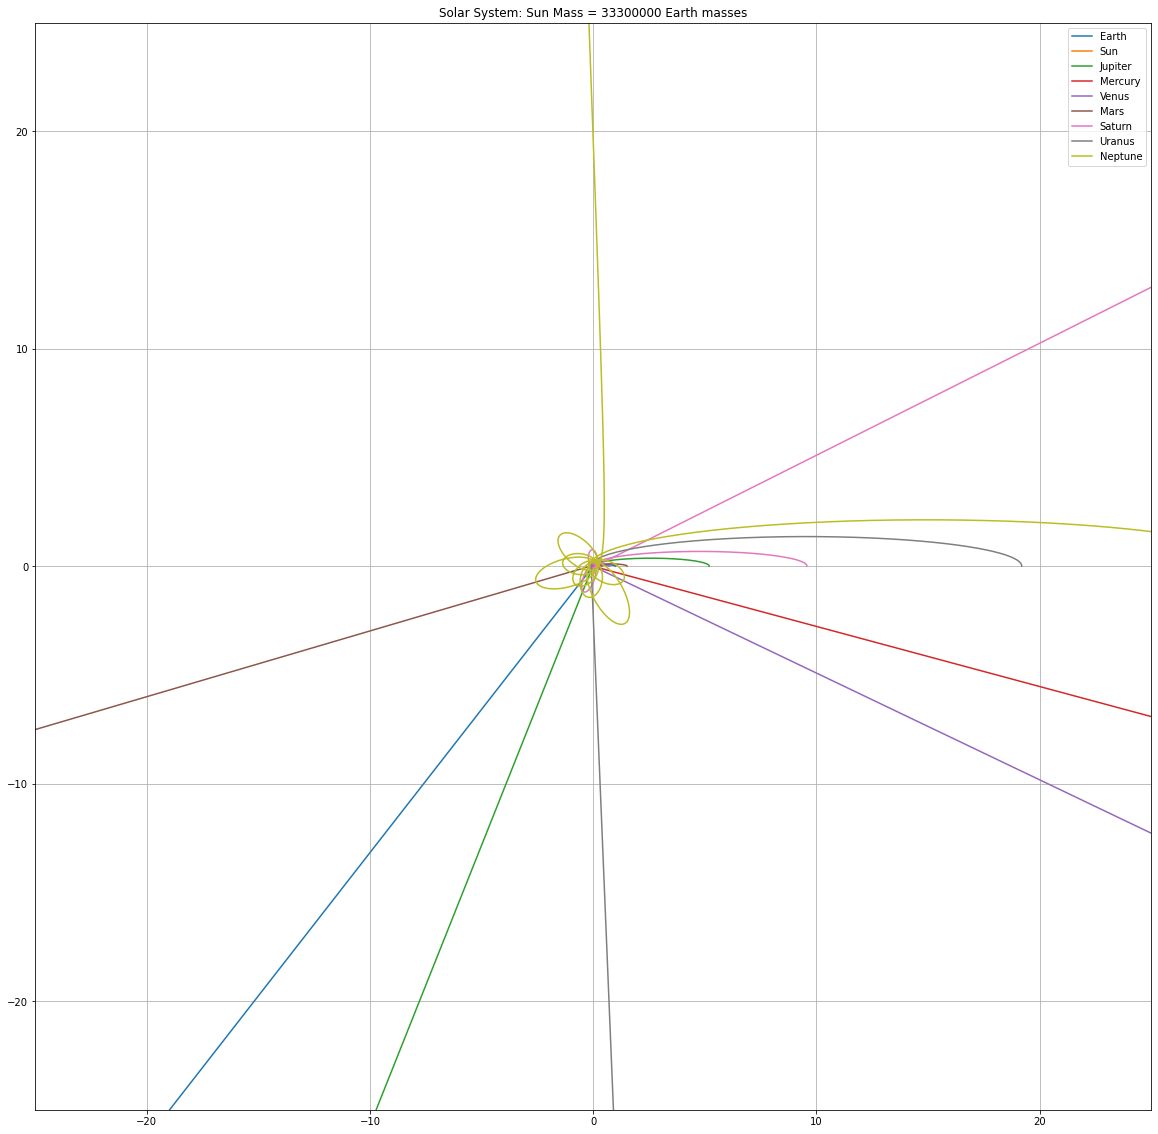

In [ ]:
# test w/ 100x sun mass and original planet velocities
#Sun_mass_adj = 333000 * 100 # Sun's mass in Earth-mass units

#vy_s = -(Ea_mass*vy_Ea+Jup_mass*vy_Jup+Merc_mass*vy_Merc+Ven_mass*vy_Ven+Mars_mass*vy_Mars+Sat_mass*vy_Sat+Ura_mass*vy_Ura+Nep_mass*vy_Nep)/Sun_mass_adj # Initial v_y of the Sun. balance momentum so center of mass doesn't change. Add planets each time
#x_s = 0 # Sun is initially at the origin

#Sun_adj = Planet(Sun_mass_adj,x_s,vy_s, 'Sun') 

Ea_mass = 1 # Units of Earth mass
Ea_radius = 1 # Units of Earth distance from the sun
Sun_mass_adj = 333000 * 100  # Sun's mass in Earth-mass units
G_N = 4*np.pi**2/Sun_mass_adj # This is Newton's constant G
vy_Ea = np.sqrt(G_N*Sun_mass/Ea_radius) #Initial v_y of the Earth

Jup_mass = 317.8
Jup_radius = 5.2
vy_Jup = np.sqrt(G_N*Sun_mass/Jup_radius)

Merc_mass = .0553
Merc_radius = .387
vy_Merc = np.sqrt(G_N*Sun_mass/Merc_radius)

Ven_mass = .815
Ven_radius = .723
vy_Ven = np.sqrt(G_N*Sun_mass/Ven_radius)

Mars_mass = .107
Mars_radius = 1.52
vy_Mars = np.sqrt(G_N*Sun_mass/Mars_radius)

Sat_mass = 95.2
Sat_radius = 9.58
vy_Sat = np.sqrt(G_N*Sun_mass/Sat_radius)

Ura_mass = 14.5
Ura_radius = 19.2
vy_Ura = np.sqrt(G_N*Sun_mass/Ura_radius)

Nep_mass = 17.1
Nep_radius = 30.05
vy_Nep = np.sqrt(G_N*Sun_mass/Nep_radius)

vy_s_Sun_adj = -(Ea_mass*vy_Ea+Jup_mass*vy_Jup+Merc_mass*vy_Merc+Ven_mass*vy_Ven+Mars_mass*vy_Mars+Sat_mass*vy_Sat+Ura_mass*vy_Ura+Nep_mass*vy_Nep)/Sun_mass_adj# # Initial v_y of the Sun. balance momentum so center of mass doesn't change. Add planets each time
x_s = 0 # Sun is initially at the origin

Jupiter = Planet(Jup_mass,Jup_radius,vy_Jup, 'Jupiter')
Sun_adj = Planet(Sun_mass_adj,x_s,vy_s_Sun_adj, 'Sun') 
Earth = Planet(Ea_mass,Ea_radius,vy_Ea, 'Earth')
Mercury = Planet(Merc_mass,Merc_radius,vy_Merc, 'Mercury')
Venus = Planet(Ven_mass,Ven_radius,vy_Ven, 'Venus')
Mars = Planet(Mars_mass,Mars_radius,vy_Mars, 'Mars')
Saturn = Planet(Sat_mass,Sat_radius,vy_Sat, 'Saturn')
Uranus = Planet(Ura_mass,Ura_radius,vy_Ura, 'Uranus')
Neptune = Planet(Nep_mass,Nep_radius,vy_Nep, 'Neptune')


N = 10000 # Number of steps we want to take
tf = 163.7 # Number of years we want to analyze
h = tf/N # Calculated step size

# A list we are creating to store our planets in
planetlist = []

# Storing our created planets into our list
planetlist.append(Earth)
planetlist.append(Sun_adj)
planetlist.append(Jupiter)
planetlist.append(Mercury)
planetlist.append(Venus)
planetlist.append(Mars)
planetlist.append(Saturn)
planetlist.append(Uranus)
planetlist.append(Neptune)

# Set the initial values for the acceleration of each planet
for planet in planetlist:
        planet.acc_update(planetlist) # Function for updating acceleration

# Performing Velocity Verlet Method
for i in range(N):
    for planet in planetlist:  # Update position of each planet
        planet.x += h*planet.vx + h**2/2*planet.ax # Updating x position
        planet.y += h*planet.vy + h**2/2*planet.ay # insert code for updating y position
        planet.r = np.sqrt(planet.x**2+planet.y**2) # Calculating distance of planet from origin. 

    for planet in planetlist:  # Update acceleration and velocity of each planet
        planet.acc_update(planetlist)  # Function for updating acceleration
        
        # For updating velocities, see Eq. 5b in Notebook 6. You'll need both current and old acceleration values.
        planet.vx += h*planet.ax_old + h/2*(planet.ax - planet.ax_old) # insert code for updating x velocity here using Velocity Verlet method. (See Eq. 5b in Notebook 6. )
        planet.vy += h*planet.ay_old + h/2*(planet.ay - planet.ay_old) # insert code for updating y velocity here using Velocity Verlet method. 
        planet.xvals.append(planet.x) # Stores x values
        planet.yvals.append(planet.y) # Stores y values

plt.figure(figsize=(20,20))


for planet in planetlist:
    plt.plot(planet.xvals,planet.yvals, label = planet.name)

plt.title("Solar System: Sun Mass = %d Earth masses" %(float(Sun_mass_adj)))
plt.xlim(-25,25)
plt.ylim(-25,25)
plt.grid()
plt.legend()
#plt.axis('equal')
plt.show()



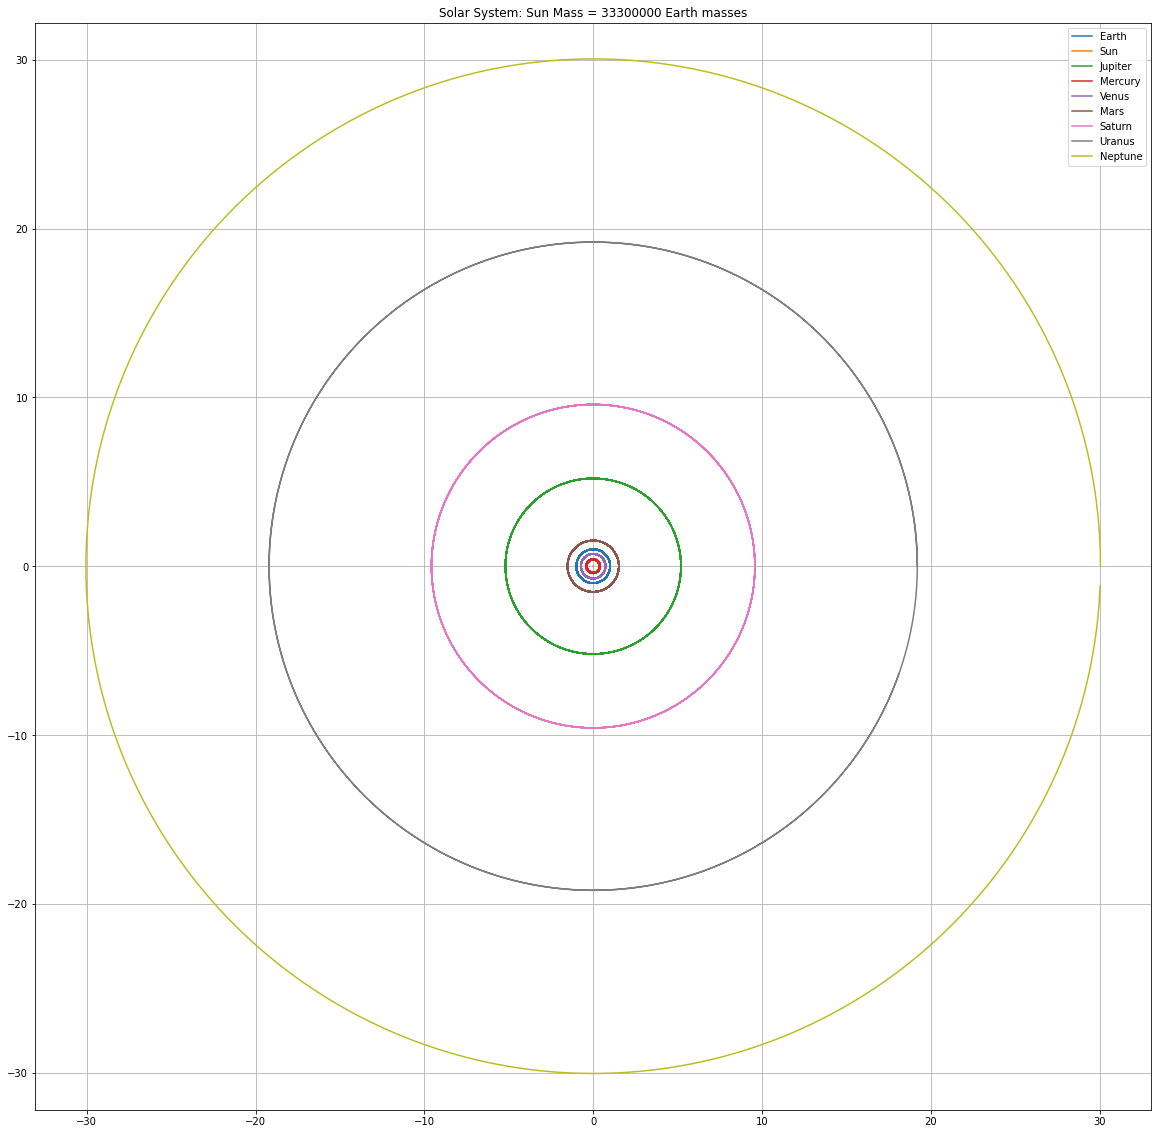

In [ ]:
# test w/ 100x sun mass and adjusted planet velocities

Ea_mass = 1 # Units of Earth mass
Ea_radius = 1 # Units of Earth distance from the sun
Sun_mass_adj = 333000 * 100  # Sun's mass in Earth-mass units
G_N = 4*np.pi**2/Sun_mass_adj # This is Newton's constant G
vy_Ea = np.sqrt(G_N*Sun_mass_adj/Ea_radius) #Initial v_y of the Earth

Jup_mass = 317.8
Jup_radius = 5.2
vy_Jup = np.sqrt(G_N*Sun_mass_adj/Jup_radius)

Merc_mass = .0553
Merc_radius = .387
vy_Merc = np.sqrt(G_N*Sun_mass_adj/Merc_radius)

Ven_mass = .815
Ven_radius = .723
vy_Ven = np.sqrt(G_N*Sun_mass_adj/Ven_radius)

Mars_mass = .107
Mars_radius = 1.52
vy_Mars = np.sqrt(G_N*Sun_mass_adj/Mars_radius)

Sat_mass = 95.2
Sat_radius = 9.58
vy_Sat = np.sqrt(G_N*Sun_mass_adj/Sat_radius)

Ura_mass = 14.5
Ura_radius = 19.2
vy_Ura = np.sqrt(G_N*Sun_mass_adj/Ura_radius)

Nep_mass = 17.1
Nep_radius = 30.05
vy_Nep = np.sqrt(G_N*Sun_mass_adj/Nep_radius)

vy_s_Sun_adj = -(Ea_mass*vy_Ea+Jup_mass*vy_Jup+Merc_mass*vy_Merc+Ven_mass*vy_Ven+Mars_mass*vy_Mars+Sat_mass*vy_Sat+Ura_mass*vy_Ura+Nep_mass*vy_Nep)/Sun_mass_adj# # Initial v_y of the Sun. balance momentum so center of mass doesn't change. Add planets each time
x_s = 0 # Sun is initially at the origin

Jupiter = Planet(Jup_mass,Jup_radius,vy_Jup, 'Jupiter')
Sun_adj = Planet(Sun_mass_adj,x_s,vy_s_Sun_adj, 'Sun') 
Earth = Planet(Ea_mass,Ea_radius,vy_Ea, 'Earth')
Mercury = Planet(Merc_mass,Merc_radius,vy_Merc, 'Mercury')
Venus = Planet(Ven_mass,Ven_radius,vy_Ven, 'Venus')
Mars = Planet(Mars_mass,Mars_radius,vy_Mars, 'Mars')
Saturn = Planet(Sat_mass,Sat_radius,vy_Sat, 'Saturn')
Uranus = Planet(Ura_mass,Ura_radius,vy_Ura, 'Uranus')
Neptune = Planet(Nep_mass,Nep_radius,vy_Nep, 'Neptune')


N = 10000 # Number of steps we want to take
tf = 163.7 # Number of years we want to analyze
h = tf/N # Calculated step size

# A list we are creating to store our planets in
planetlist = []

# Storing our created planets into our list
planetlist.append(Earth)
planetlist.append(Sun_adj)
planetlist.append(Jupiter)
planetlist.append(Mercury)
planetlist.append(Venus)
planetlist.append(Mars)
planetlist.append(Saturn)
planetlist.append(Uranus)
planetlist.append(Neptune)

# Set the initial values for the acceleration of each planet
for planet in planetlist:
        planet.acc_update(planetlist) # Function for updating acceleration

# Performing Velocity Verlet Method
for i in range(N):
    for planet in planetlist:  # Update position of each planet
        planet.x += h*planet.vx + h**2/2*planet.ax # Updating x position
        planet.y += h*planet.vy + h**2/2*planet.ay # insert code for updating y position
        planet.r = np.sqrt(planet.x**2+planet.y**2) # Calculating distance of planet from origin. 

    for planet in planetlist:  # Update acceleration and velocity of each planet
        planet.acc_update(planetlist)  # Function for updating acceleration
        
        # For updating velocities, see Eq. 5b in Notebook 6. You'll need both current and old acceleration values.
        planet.vx += h*planet.ax_old + h/2*(planet.ax - planet.ax_old) # insert code for updating x velocity here using Velocity Verlet method. (See Eq. 5b in Notebook 6. )
        planet.vy += h*planet.ay_old + h/2*(planet.ay - planet.ay_old) # insert code for updating y velocity here using Velocity Verlet method. 
        planet.xvals.append(planet.x) # Stores x values
        planet.yvals.append(planet.y) # Stores y values

plt.figure(figsize=(20,20))


for planet in planetlist:
    plt.plot(planet.xvals,planet.yvals, label = planet.name)

plt.title("Solar System: Sun Mass = %d Earth masses" %(float(Sun_mass_adj)))
#plt.xlim(-25,25)
#plt.ylim(-25,25)
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()